<a href="https://colab.research.google.com/github/Hardik-Garbyal/LLM-model-for-sumarization/blob/main/Open_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Define the text summarization context (e.g., news articles).**

Model Selection: Pick at least three OpenLLMs.

Implementation: Implement text summarization for each model.

Metrics: Use ROUGE scores for performance evaluation.

Evaluation: Apply metrics to each model.

using huggin face models. Three models have been used GPT2, BART, T5
Models used are pretuned model, and imported from libraries.


Using GPT2 (Hugging face)

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/news_summaries - Copy.csv')

In [ ]:

del df['date']
del df['author']
del df['read_more']

In [ ]:
df.head()

,headlines,text
0,"CBI books Rajasthan CM's brother, 14 others in...",The CBI has registered a case against Rajastha...
1,Fan shares selfie taken by SRK with his father...,Twitter user Rohan Mukherjee shared that his f...
2,European Commission recommends Ukraine be gran...,The European Commission on Friday recommended ...
3,Jos Buttler smashes England's second-fastest O...,England's Jos Buttler on Friday smashed the se...
4,Paytm CEO Vijay Shekhar buys 1.7 lakh shares o...,Paytm Founder and CEO Vijay Shekhar Sharma has...


In [ ]:
df.tail()

,headlines,text
116,"China blocks India, US' move to list Pakistan-...",China has blocked a joint proposal by India an...
117,"Rohit Shetty confirms 'Singham 3', says it is ...",Filmmaker Rohit Shetty in an interview confirm...
118,"Got Russell out but it was a no-ball, felt lik...",Discussing an IPL 2022 match between GT and KK...
119,Morocco's King tests positive for COVID-19,King Mohammed VI of Morocco has tested positiv...
120,Daily COVID-19 cases near 800-mark in Bengalur...,The number of daily coronavirus cases in Benga...


In [ ]:
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess
# import nltk
# nltk.download('punkt')

In [ ]:
df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in df['text']]
print(df['tokenized_text'].head(10))

0    [the, cbi, has, registered, case, against, raj...
1    [twitter, user, rohan, mukherjee, shared, that...
2    [the, european, commission, on, friday, recomm...
3    [england, jos, buttler, on, friday, smashed, t...
4    [paytm, founder, and, ceo, vijay, shekhar, sha...
5    [video, has, shown, boy, travelling, inside, s...
6    [woman, was, allegedly, raped, by, her, friend...
7    [woman, falsely, claiming, that, her, husband,...
8    [isolated, extremely, heavy, rainfall, is, lik...
9    [three, year, old, boy, was, killed, and, his,...
Name: tokenized_text, dtype: object


In [ ]:
df['tokenized_headlines'] = [simple_preprocess(line, deacc=True) for line in df['headlines']]
print(df['tokenized_headlines'].head(10))

0    [cbi, books, rajasthan, cm, brother, others, i...
1    [fan, shares, selfie, taken, by, srk, with, hi...
2    [european, commission, recommends, ukraine, be...
3    [jos, buttler, smashes, england, second, faste...
4    [paytm, ceo, vijay, shekhar, buys, lakh, share...
5    [child, breaks, down, as, school, bus, gets, s...
6    [woman, raped, after, returning, from, party, ...
7    [wife, falsely, accusing, husband, of, impoten...
8    [heavy, rainfall, warning, issued, for, severa...
9    [yr, old, boy, killed, others, injured, as, ho...
Name: tokenized_headlines, dtype: object


In [ ]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.5 MB/s eta 0:00:00


In [ ]:

from transformers import GPT2Tokenizer, GPT2LMHeadModel
from tqdm import tqdm




In [ ]:

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

In [ ]:

# Function to generate summaries using GPT-2
def generate_summary(text):
    # Tokenize and truncate input
    input_ids = tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)

    # Debug: Print tokenized input text
    print("Tokenized Input Text:", tokenizer.decode(input_ids[0]))

    # Generate the summary with a reduced max_length
    summary_ids = model.generate(input_ids, max_length=512, min_length=30, num_beams=4, length_penalty=2.0, early_stopping=True)

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary


In [ ]:

df.to_csv('your_updated_dataset_with_summaries.csv', index=False)

In [ ]:
df = pd.read_csv('/content/your_updated_dataset_with_summaries.csv')

In [ ]:
generated_summaries = df['summary'].tolist()

# If you have reference summaries, extract them as well
reference_summaries = df['headlines'].tolist()

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge

In [ ]:
r  = Rouge()

In [ ]:
scores = r.get_scores(generated_summaries, reference_summaries, avg=True)

# Print the scores
print(scores)

{'rouge-1': {'r': 0.6543618989717677, 'p': 0.13465210834896083, 'f': 0.22202073800969616}, 'rouge-2': {'r': 0.2863362816085227, 'p': 0.044707524119422165, 'f': 0.0768494248404407}, 'rouge-l': {'r': 0.5829367838179214, 'p': 0.11938252278451646, 'f': 0.19704650712937363}}


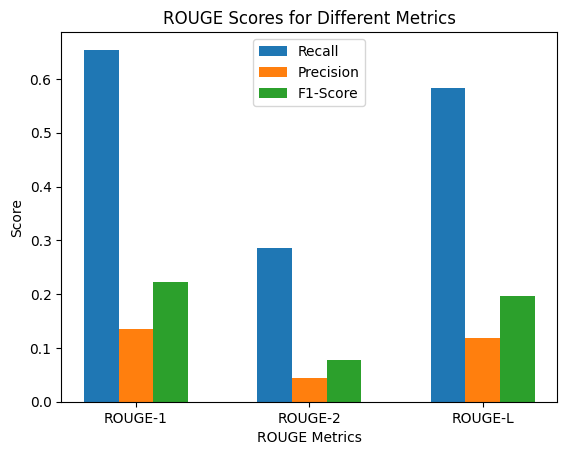

In [ ]:
import matplotlib.pyplot as plt

# Your ROUGE scores
rouge_1_scores = {'r': 0.6543618989717677, 'p': 0.13465210834896083, 'f': 0.22202073800969616}
rouge_2_scores = {'r': 0.2863362816085227, 'p': 0.044707524119422165, 'f': 0.0768494248404407}
rouge_l_scores = {'r': 0.5829367838179214, 'p': 0.11938252278451646, 'f': 0.19704650712937363}

# ROUGE metrics and labels
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
recall = [rouge_1_scores['r'], rouge_2_scores['r'], rouge_l_scores['r']]
precision = [rouge_1_scores['p'], rouge_2_scores['p'], rouge_l_scores['p']]
f1_score = [rouge_1_scores['f'], rouge_2_scores['f'], rouge_l_scores['f']]

# Create bar plots
width = 0.2
x = range(len(metrics))

plt.bar([i - width for i in x], recall, width=width, label='Recall', align='center')
plt.bar(x, precision, width=width, label='Precision', align='center')
plt.bar([i + width for i in x], f1_score, width=width, label='F1-Score', align='center')

plt.xlabel('ROUGE Metrics')
plt.ylabel('Score')
plt.title('ROUGE Scores for Different Metrics')
plt.xticks(x, metrics)
plt.legend()
plt.show()


Using BART

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration
from tqdm import tqdm

In [ ]:
# Initialize the BART tokenizer and model
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

In [ ]:
def generate_summary(text):
    # Tokenize and truncate the input
    input_ids = tokenizer.encode(text, return_tensors="pt", max_length=1024, truncation=True)

    # Generate the summary with a reduced max_length
    summary_ids = model.generate(input_ids, max_length=512, min_length=30, num_beams=4, length_penalty=2.0, early_stopping=True)

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary


In [ ]:
# Create a new column for summaries
df['summary'] = ""

# Iterate through the dataset and generate summaries
for index, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    summary = generate_summary(text)
    df.at[index, 'summary'] = summary


100%|██████████| 121/121 [24:05<00:00, 11.94s/it]


In [ ]:
df.to_csv('bart.csv', index=False)


In [ ]:
bartdf = pd.read_csv('/content/bart.csv')

In [ ]:
bartdf.head()

,headlines,text,tokenized_text,tokenized_headlines,summary
0,"CBI books Rajasthan CM's brother, 14 others in...",The CBI has registered a case against Rajastha...,"['the', 'cbi', 'has', 'registered', 'case', 'a...","['cbi', 'books', 'rajasthan', 'cm', 'brother',...",The CBI has registered a case against Rajastha...
1,Fan shares selfie taken by SRK with his father...,Twitter user Rohan Mukherjee shared that his f...,"['twitter', 'user', 'rohan', 'mukherjee', 'sha...","['fan', 'shares', 'selfie', 'taken', 'by', 'sr...",Twitter user Rohan Mukherjee shared that his f...
2,European Commission recommends Ukraine be gran...,The European Commission on Friday recommended ...,"['the', 'european', 'commission', 'on', 'frida...","['european', 'commission', 'recommends', 'ukra...","""Ukraine has clearly shown commitment to live ..."
3,Jos Buttler smashes England's second-fastest O...,England's Jos Buttler on Friday smashed the se...,"['england', 'jos', 'buttler', 'on', 'friday', ...","['jos', 'buttler', 'smashes', 'england', 'seco...",Jos Buttler hits second-fastest ODI hundred by...
4,Paytm CEO Vijay Shekhar buys 1.7 lakh shares o...,Paytm Founder and CEO Vijay Shekhar Sharma has...,"['paytm', 'founder', 'and', 'ceo', 'vijay', 's...","['paytm', 'ceo', 'vijay', 'shekhar', 'buys', '...",Vijay Shekhar Sharma has purchased 1.7 lakh sh...


In [ ]:
bart_summaries = df['summary'].tolist()

# If you have reference summaries, extract them as well
og_summaries = df['headlines'].tolist()

In [ ]:
scores = r.get_scores(bart_summaries, og_summaries, avg=True)

# Print the scores
print(scores)

{'rouge-1': {'r': 0.5010300865611995, 'p': 0.1865155056227788, 'f': 0.26917885496222166}, 'rouge-2': {'r': 0.20642313717180022, 'p': 0.06560546228754276, 'f': 0.09837014486543078}, 'rouge-l': {'r': 0.4379194254133485, 'p': 0.16243633770497293, 'f': 0.2346219109034847}}


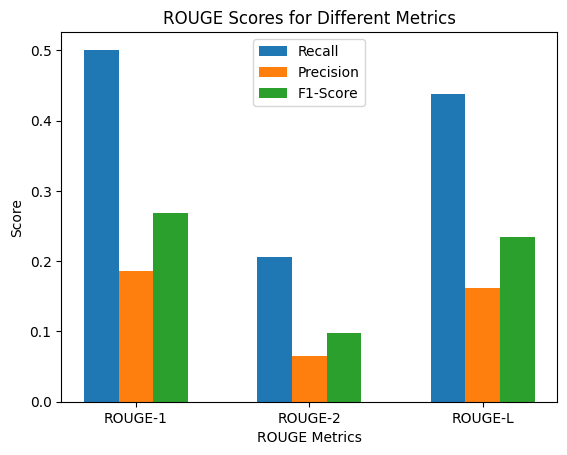

In [ ]:
import matplotlib.pyplot as plt

# Your ROUGE scores
rouge_1_scores = {'r': 0.5010300865611995, 'p': 0.1865155056227788, 'f': 0.26917885496222166}
rouge_2_scores = {'r': 0.20642313717180022, 'p': 0.06560546228754276, 'f': 0.09837014486543078}
rouge_l_scores = {'r': 0.4379194254133485, 'p': 0.16243633770497293, 'f': 0.2346219109034847}

# ROUGE metrics and labels
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
recall = [rouge_1_scores['r'], rouge_2_scores['r'], rouge_l_scores['r']]
precision = [rouge_1_scores['p'], rouge_2_scores['p'], rouge_l_scores['p']]
f1_score = [rouge_1_scores['f'], rouge_2_scores['f'], rouge_l_scores['f']]

# Create bar plots
width = 0.2
x = range(len(metrics))

plt.bar([i - width for i in x], recall, width=width, label='Recall', align='center')
plt.bar(x, precision, width=width, label='Precision', align='center')
plt.bar([i + width for i in x], f1_score, width=width, label='F1-Score', align='center')

plt.xlabel('ROUGE Metrics')
plt.ylabel('Score')
plt.title('ROUGE Scores for Different Metrics')
plt.xticks(x, metrics)
plt.legend()
plt.show()


T5



In [ ]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer
from tqdm import tqdm

In [ ]:
pip install sentencepiece


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.4 MB/s eta 0:00:00


In [ ]:
model_name = 't5-small'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def t5_generate_summary(text):
    # Tokenize and truncate input
    input_ids = tokenizer.encode("summarize: " + text, return_tensors='pt', max_length=512, truncation=True)

    # Generate the summary with the model
    summary_ids = model.generate(input_ids, max_length=150, min_length=30, num_beams=4, length_penalty=2.0, early_stopping=True)

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

In [ ]:
# df['summary'] = df['text'].apply(generate_summary)

In [ ]:
df['T5_summary'] = ""

# Iterate through the dataset and generate summaries
for index, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    summary = t5_generate_summary(text)
    df.at[index, 'summary'] = summary

100%|██████████| 121/121 [04:53<00:00,  2.43s/it]


In [ ]:
df.to_csv('T5.csv', index=False)

In [ ]:
t5df = pd.read_csv('/content/T5.csv')

In [ ]:
t5df.head()

,headlines,text,T5_summary,summary
0,"CBI books Rajasthan CM's brother, 14 others in...",The CBI has registered a case against Rajastha...,NaN,the CBI has registered a case against the brot...
1,Fan shares selfie taken by SRK with his father...,Twitter user Rohan Mukherjee shared that his f...,NaN,Rohan Mukherjee shared that his father met Sha...
2,European Commission recommends Ukraine be gran...,The European Commission on Friday recommended ...,NaN,the leaders of the bloc's 27 existing members ...
3,Jos Buttler smashes England's second-fastest O...,England's Jos Buttler on Friday smashed the se...,NaN,the 31-year-old smashed the second-fastest ODI...
4,Paytm CEO Vijay Shekhar buys 1.7 lakh shares o...,Paytm Founder and CEO Vijay Shekhar Sharma has...,NaN,Vijay Shekhar Sharma has bought 1.7 lakh share...


In [ ]:
tf_summaries = t5df['summary'].tolist()

# If you have reference summaries, extract them as well
og_summaries = t5df['headlines'].tolist()

In [ ]:
scores = r.get_scores(tf_summaries, og_summaries, avg=True)

# Print the scores
print(scores)

{'rouge-1': {'r': 0.35824009418443054, 'p': 0.17399013327520269, 'f': 0.23119532762669065}, 'rouge-2': {'r': 0.13812838298740096, 'p': 0.0587774752642939, 'f': 0.08118453495289045}, 'rouge-l': {'r': 0.32494991909187343, 'p': 0.15789312191528432, 'f': 0.20983450205248794}}


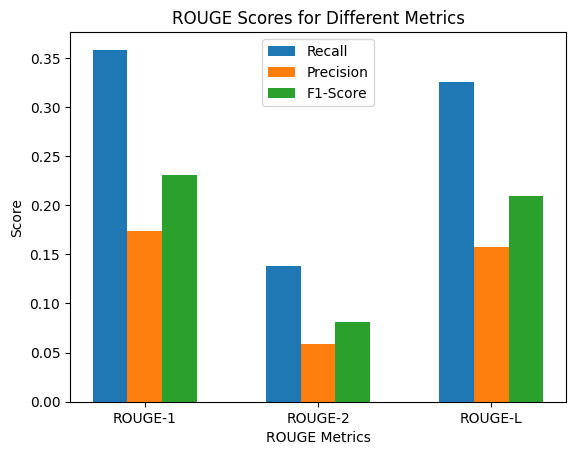

In [ ]:
import matplotlib.pyplot as plt

# Your ROUGE scores
rouge_1_scores = {'r': 0.35824009418443054, 'p': 0.17399013327520269, 'f': 0.23119532762669065}
rouge_2_scores = {'r': 0.13812838298740096, 'p': 0.0587774752642939, 'f': 0.08118453495289045}
rouge_l_scores = {'r': 0.32494991909187343, 'p': 0.15789312191528432, 'f': 0.20983450205248794}

# ROUGE metrics and labels
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
recall = [rouge_1_scores['r'], rouge_2_scores['r'], rouge_l_scores['r']]
precision = [rouge_1_scores['p'], rouge_2_scores['p'], rouge_l_scores['p']]
f1_score = [rouge_1_scores['f'], rouge_2_scores['f'], rouge_l_scores['f']]

# Create bar plots
width = 0.2
x = range(len(metrics))

plt.bar([i - width for i in x], recall, width=width, label='Recall', align='center')
plt.bar(x, precision, width=width, label='Precision', align='center')
plt.bar([i + width for i in x], f1_score, width=width, label='F1-Score', align='center')

plt.xlabel('ROUGE Metrics')
plt.ylabel('Score')
plt.title('ROUGE Scores for Different Metrics')
plt.xticks(x, metrics)
plt.legend()
plt.show()


Comparison

Best Model: BART


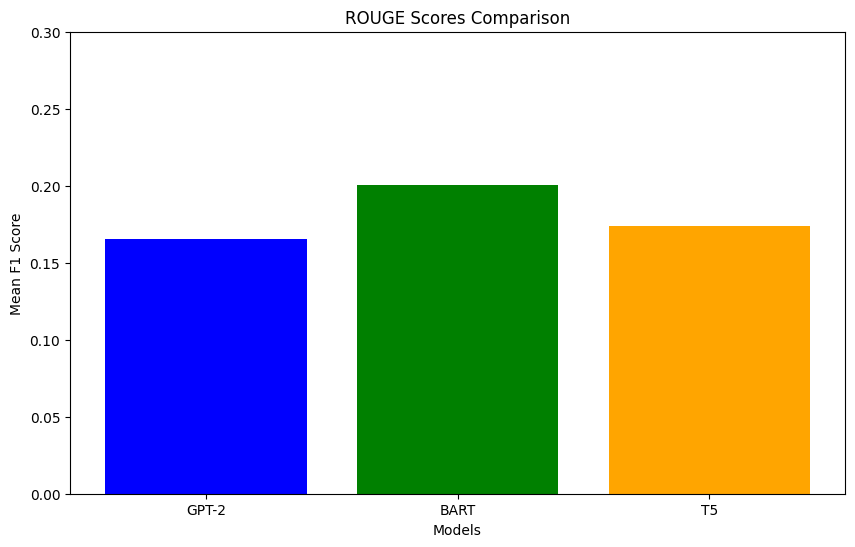

In [1]:
import matplotlib.pyplot as plt

# Define ROUGE scores for each model
models = ["GPT-2", "BART", "T5"]
rouge_1_scores = [0.222, 0.269, 0.231]
rouge_2_scores = [0.077, 0.098, 0.081]
rouge_l_scores = [0.197, 0.235, 0.210]

# Calculate the mean F1 score for each model
mean_f1_scores = [(r1 + r2 + rl) / 3 for r1, r2, rl in zip(rouge_1_scores, rouge_2_scores, rouge_l_scores)]

# Find the best model based on mean F1 score
best_model = models[mean_f1_scores.index(max(mean_f1_scores))]
print("Best Model:", best_model)

# Create a bar plot to visualize the F1 scores
plt.figure(figsize=(10, 6))
plt.bar(models, mean_f1_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Mean F1 Score')
plt.title('ROUGE Scores Comparison')
plt.ylim(0, 0.3)  # Adjust the y-axis range if needed
plt.show()
